# **MBA - 3ª Etapa - Inteligência de Mercado**
Objetivos:

**1º Importações das Bibliotecas Utilizadas nos tratamentos dos dados.**

**2º Carregar dados Caged Março de 2021;**

    Origem : ftp://ftp.mtps.gov.br/pdet/microdados/NOVO%20CAGED/Movimenta%E7%F5es/2021/Mar%E7o/

**3º Tratamento dos dados:**
*   Exclui colunas não úteis;
*   Dados genéricos e não declarados excluídos;
*   Sexo masculino 1 e 2 feminino;
*   Tipo de Deficiência 0 Sem e 1 Com (retirando a subdivisão numérica);
*   Salário acima de 1.000 e abaixo de 30.000;
*   Grau de Instrução: 0 para escolaridade menor ou igual ao 5º ano; 1 para igual ou menor que ensino médio; 2 para menor ou igual ao ensino suprior; 2 para menor ou igual que doutorado;



In [ ]:
#### IMPORTAÇÕES USADAS ####
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
#### CARREGAMENTO DO ARQUIVO ###
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/TCC_CAGED/CAGEDMOV202103.txt', error_bad_lines=False, sep=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(3031874, 24)

In [ ]:
### Excluindo Colunas ###
 
df = df.drop(columns=['competencia', 'subclasse', 'seção', 
                      'saldomovimentacao','horascontratuais','tipoempregador',
                      'tipoestabelecimento', 'indtrabintermitente', 'indtrabparcial',
                      'tamestabjan','indicadoraprendiz', 'fonte'])
 
#### RETIRANDO DADOS NÃO INFORMADOS E TRATANDO OUTROS DADOS COMO SEXO ###
 
df = df.loc[df['graudeinstrucao']<99]
df = df.loc[df['racacor']<6]
df = df.loc[df['tipodedeficiencia']<9]
df['sexo']=df['sexo'].replace(3,2)
 
### TRATANDO DEFICIÊNCIA TIPO / PARA SIM 1 E 0 NÃO ### 
 
df['tipodedeficiencia']=df['tipodedeficiencia'].replace(2,1)
df['tipodedeficiencia']=df['tipodedeficiencia'].replace(3,1)
df['tipodedeficiencia']=df['tipodedeficiencia'].replace(4,1)
df['tipodedeficiencia']=df['tipodedeficiencia'].replace(5,1)
df['tipodedeficiencia']=df['tipodedeficiencia'].replace(6,1)
 
### TRATANDO COR / 1 PARA BRANCO E 2 PARA OUTROS ###
 
df['racacor']=df['racacor'].replace(2,2)
df['racacor']=df['racacor'].replace(3,2)
df['racacor']=df['racacor'].replace(4,2)
df['racacor']=df['racacor'].replace(5,2)
 
### ARREDONDAR SALÁRIO ###
 
df['salario'] = df['salario'].round(2)
 
## PEGAR ACIMA DE SALÁRIO MÍNIMO E ABAIXO DE R$ 30.000,00
df = df[(df['salario'] >= 1100) & (df['salario'] <= 30000 )]
 
### TRATANDO GRAU DE INSTRUÇAO ///
### 0 PARA MENOR QUE 5 ANO/ 1 PARA MENOR MÉDIO / 2 PARA MENOR SUPERIOR / 3 PARA MENOR QUE DOUTORADO
df['graudeinstrucao']=df['graudeinstrucao'].replace(1,0)
df['graudeinstrucao']=df['graudeinstrucao'].replace(2,0)
df['graudeinstrucao']=df['graudeinstrucao'].replace(3,0)
df['graudeinstrucao']=df['graudeinstrucao'].replace(4,1)
df['graudeinstrucao']=df['graudeinstrucao'].replace(5,1)
df['graudeinstrucao']=df['graudeinstrucao'].replace(6,1)
df['graudeinstrucao']=df['graudeinstrucao'].replace(7,1)
df['graudeinstrucao']=df['graudeinstrucao'].replace(8,2)
df['graudeinstrucao']=df['graudeinstrucao'].replace(9,2)
df['graudeinstrucao']=df['graudeinstrucao'].replace(10,3)
df['graudeinstrucao']=df['graudeinstrucao'].replace(11,3)
df['graudeinstrucao']=df['graudeinstrucao'].replace(80,3)

 
df.head(3)

,regiao,uf,municipio,cbo2002ocupacao,categoria,graudeinstrucao,idade,racacor,sexo,tipomovimentacao,tipodedeficiencia,salario
0,5,52,520110,784205,101,1,34.0,2,1,20,0,1441.08
1,4,43,431990,411010,101,2,28.0,1,2,31,0,2800.00
2,4,42,421500,784205,101,1,19.0,1,1,43,0,1365.00


In [ ]:
df['sexo'].value_counts()

1    1866683
3    1165191
Name: sexo, dtype: int64

In [ ]:
df.shape

(2066549, 12)

In [ ]:
df['idade'].describe().round(2)

count    2066549.00
mean          33.65
std           10.69
min           14.00
25%           25.00
50%           32.00
75%           40.00
max           97.00
Name: idade, dtype: float64

In [ ]:
df['salario'].describe().round(1)

count    2066549.0
mean        1880.3
std         1673.1
min         1100.0
25%         1234.6
50%         1438.0
75%         1810.6
max        30000.0
Name: salario, dtype: float64

<function matplotlib.pyplot.show>

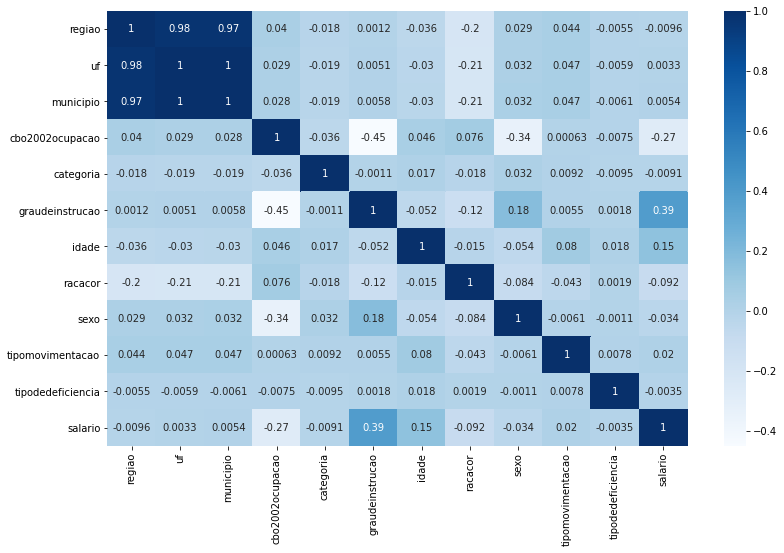

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),cmap='Blues', annot=True)
plt.show

In [ ]:
relacao = df


relacao['sexo'] = relacao['sexo'].astype(str)
relacao['sexo'] = relacao['sexo'].replace('1','Masculino')
relacao['sexo'] = relacao['sexo'].replace('2','Feminino')

relacao['racacor']=relacao['racacor'].astype(str)
relacao['racacor'] = relacao['racacor'].replace('1','Brancos (as)')
relacao['racacor'] = relacao['racacor'].replace('2','Outros (as)')

relacao[['salario','graudeinstrucao', 'idade', 'sexo','racacor']].groupby(['sexo','racacor'])\
.mean().sort_values(by='salario', ascending=False).round(2)

,,salario,graudeinstrucao,idade
sexo,racacor,,,
Masculino,Brancos (as),2101.04,1.13,34.29
Feminino,Brancos (as),1940.37,1.30,33.15
Masculino,Outros (as),1768.18,1.02,33.94
Feminino,Outros (as),1642.06,1.19,32.58


In [ ]:
dfbase

,regiao,uf,municipio,cbo2002ocupacao,categoria,graudeinstrucao,idade,racacor,sexo,tipomovimentacao,tipodedeficiencia,salario
0,5,52,520110,784205,101,1,34.0,Outros (as),Masculino,20,0,1441.08
1,4,43,431990,411010,101,2,28.0,Brancos (as),Feminino,31,0,2800.00
2,4,42,421500,784205,101,1,19.0,Brancos (as),Masculino,43,0,1365.00
3,4,43,432260,514320,101,1,31.0,Outros (as),Feminino,20,0,1269.40
5,3,35,355030,717020,101,1,26.0,Outros (as),Masculino,20,0,1551.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3031868,3,31,310620,517410,101,1,34.0,Outros (as),Feminino,40,0,1520.90
3031869,3,35,355030,724315,102,1,52.0,Brancos (as),Masculino,10,0,1500.00
3031870,3,35,355030,513205,111,1,47.0,Outros (as),Feminino,20,0,6567.00
3031871,2,25,251370,764105,101,1,52.0,Brancos (as),Masculino,31,0,1122.00


In [ ]:
relacao[['salario','graudeinstrucao', 'idade', 'sexo','racacor']].groupby(['sexo','racacor'])\
.mean().sort_values(by='salario', ascending=False).round(2).reset_index()

,sexo,racacor,salario,graudeinstrucao,idade
0,Masculino,Brancos (as),2101.04,7.50,34.29
1,Feminino,Brancos (as),1940.37,8.85,33.15
2,Masculino,Outros (as),1768.18,6.64,33.94
3,Feminino,Outros (as),1642.06,7.92,32.58


In [ ]:
print ("PERCENTIL 50% OU MEDIANA")
relacao[['salario','graudeinstrucao', 'idade', 'sexo','racacor']].groupby(['sexo','racacor'])\
.quantile(q=0.5).sort_values(by='salario', ascending=False).round(2).reset_index()

PERCENTIL 50% OU MEDIANA


,sexo,racacor,salario,graudeinstrucao,idade
0,Masculino,Brancos (as),1527.00,7.0,32.0
1,Masculino,Outros (as),1434.42,7.0,32.0
2,Feminino,Brancos (as),1413.96,7.0,31.0
3,Feminino,Outros (as),1300.00,7.0,31.0


In [ ]:
print ("PERCENTIL 90%")
relacao[['salario','graudeinstrucao', 'idade', 'sexo','racacor']].groupby(['sexo','racacor'])\
.quantile(q=0.9).sort_values(by='salario', ascending=False).round(2).reset_index()

PERCENTIL 90%


,sexo,racacor,salario,graudeinstrucao,idade
0,Feminino,Brancos (as),3100.00,9.0,48.0
1,Masculino,Brancos (as),3080.00,9.0,51.0
2,Masculino,Outros (as),2477.32,7.0,49.0
3,Feminino,Outros (as),2400.20,9.0,46.0


In [ ]:
print ("PERCENTIL 75%")
relacao[['salario','graudeinstrucao', 'idade', 'sexo','racacor']].groupby(['sexo','racacor'])\
.quantile(q=0.75).sort_values(by='salario', ascending=False).round(2).reset_index()

PERCENTIL 75%


,sexo,racacor,salario,graudeinstrucao,idade
0,Masculino,Brancos (as),1980.00,7.0,42.0
1,Masculino,Outros (as),1800.00,7.0,41.0
2,Feminino,Brancos (as),1793.83,8.0,40.0
3,Feminino,Outros (as),1556.00,7.0,39.0


<Figure size 1500x800 with 0 Axes>

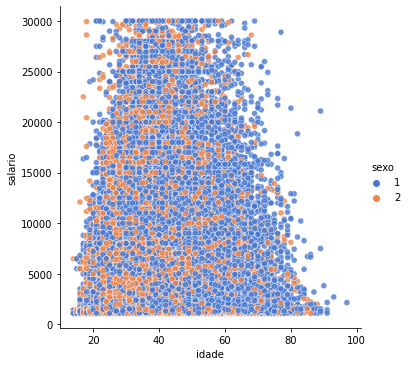

In [ ]:
plt.figure(figsize=(15,8), dpi=100)
sns.relplot(x='idade', y='salario', hue='sexo', data=df, 
           alpha=0.8, palette='muted')

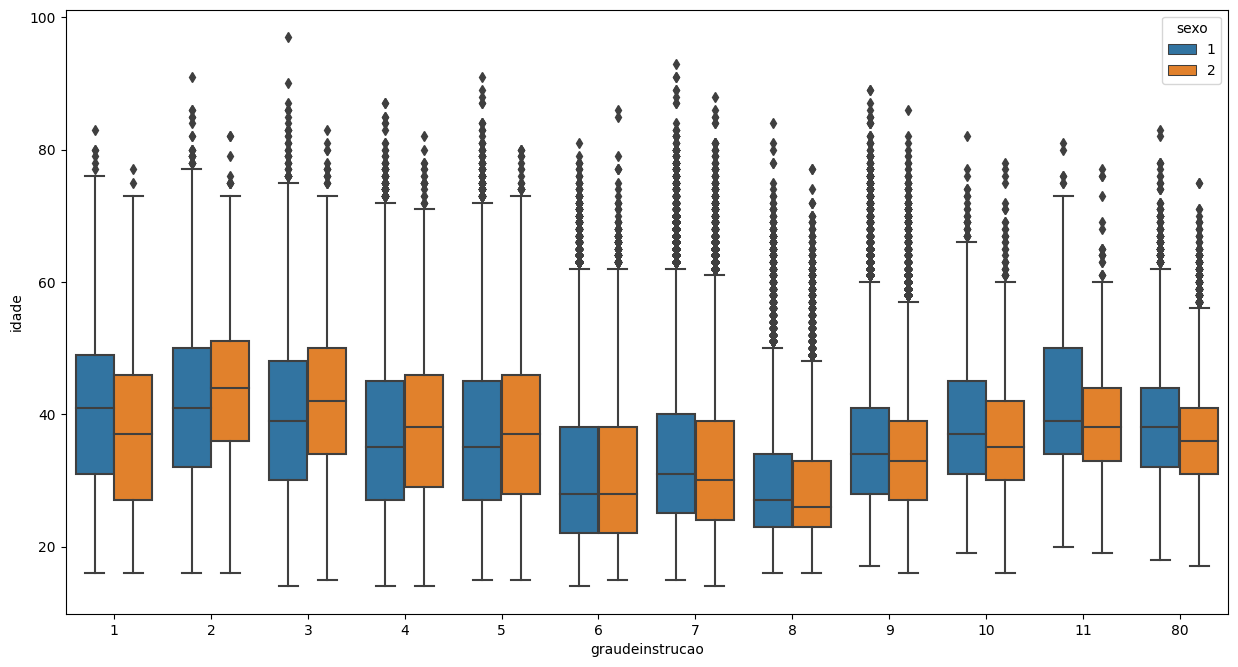

In [ ]:
plt.figure(figsize=(15,8), dpi=100)
sns.boxplot(x='graudeinstrucao',y='idade', hue='sexo', data=df)
plt.show()

## TRATANDO MEU MUNICÍPIO

In [ ]:
#DADOS BETIM
#df2 = df[(df['municipio'] ==310670)] # Número da Cidade de Betim - Layout Caged
df2 = df[(df['uf'] ==31)] # Número do Estado de Minas Gerais - Layout Caged
#df2['salario'] = ( df2['salario'] - df2['salario'].min() ) / ( df2['salario'].max() - df2['salario'].min() )
df2 = df2.drop(columns=['regiao', 'uf', 'municipio','tipomovimentacao','tipodedeficiencia'])

In [ ]:
df2.shape

(214443, 9)

In [ ]:
df2['sexo'].value_counts()

Masculino    141130
Feminino      73313
Name: sexo, dtype: int64

In [ ]:
df2

,cbo2002ocupacao,categoria,graudeinstrucao,idade,racacor,sexo,salario
9,421125,101,1,29.0,2,2,0.000861
11,513505,101,1,25.0,2,2,0.000000
35,848515,101,1,23.0,1,2,0.010363
37,422315,101,1,20.0,2,1,0.000000
52,732120,101,1,53.0,1,1,0.035400
...,...,...,...,...,...,...,...
3031785,514320,101,1,50.0,2,2,0.002591
3031805,715210,101,1,42.0,2,1,0.027024
3031809,911305,101,1,35.0,1,1,0.024706
3031826,725505,101,2,25.0,2,1,0.019869


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214443 entries, 9 to 3031868
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cbo2002ocupacao    214443 non-null  int64  
 1   categoria          214443 non-null  int64  
 2   graudeinstrucao    214443 non-null  int64  
 3   idade              214443 non-null  float64
 4   racacor            214443 non-null  object 
 5   sexo               214443 non-null  object 
 6   tipomovimentacao   214443 non-null  int64  
 7   tipodedeficiencia  214443 non-null  int64  
 8   salario            214443 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 16.4+ MB


In [ ]:
df2.head(2)

,cbo2002ocupacao,categoria,graudeinstrucao,idade,racacor,sexo,tipomovimentacao,tipodedeficiencia,salario
9,421125,101,1,29.0,2,2,60,0,1124.88
11,513505,101,1,25.0,2,2,20,0,1100.00


<function matplotlib.pyplot.show>

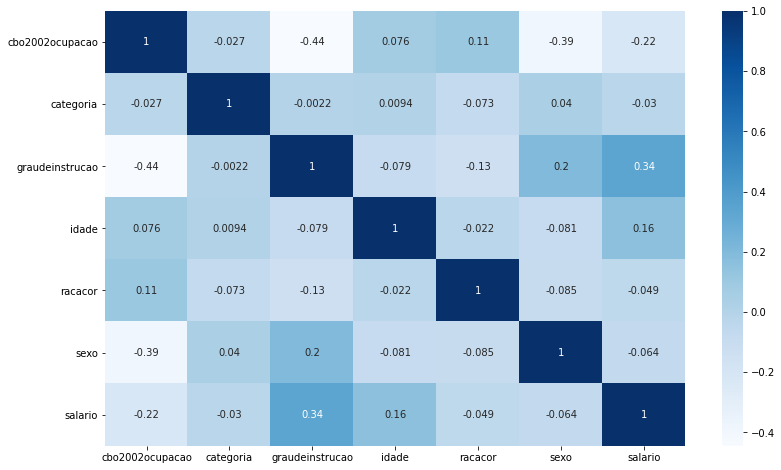

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(df2.corr(),cmap='Blues', annot=True)
plt.show

In [ ]:
df2

,cbo2002ocupacao,categoria,graudeinstrucao,idade,racacor,sexo,salario
9,421125,101,1,29.0,2,2,1124.88
11,513505,101,1,25.0,2,2,1100.00
35,848515,101,1,23.0,1,2,1399.48
37,422315,101,1,20.0,2,1,1100.00
52,732120,101,1,53.0,1,1,2123.05
...,...,...,...,...,...,...,...
3031785,514320,101,1,50.0,2,2,1174.88
3031805,715210,101,1,42.0,2,1,1881.00
3031809,911305,101,1,35.0,1,1,1814.00
3031826,725505,101,2,25.0,2,1,1674.20


In [ ]:
relacao = df2

relacao['sexo']=relacao['sexo'].astype(str)
relacao['sexo'] = relacao['sexo'].replace('1','Masculino')
relacao['sexo'] = relacao['sexo'].replace('2','Feminino')

relacao['racacor']=relacao['racacor'].astype(str)
relacao['racacor'] = relacao['racacor'].replace('1','Brancos (as)')
relacao['racacor'] = relacao['racacor'].replace('2','Outros (as)')

relacao[['salario','graudeinstrucao', 'idade', 'sexo','racacor']].groupby(['sexo','racacor'])\
.mean().sort_values(by='salario', ascending=False).round(2).reset_index()

,sexo,racacor,salario,graudeinstrucao,idade
0,Masculino,Brancos (as),1916.23,1.11,34.64
1,Masculino,Outros (as),1762.52,1.00,34.10
2,Feminino,Brancos (as),1721.19,1.32,32.91
3,Feminino,Outros (as),1536.48,1.19,32.06


<Figure size 1500x800 with 0 Axes>

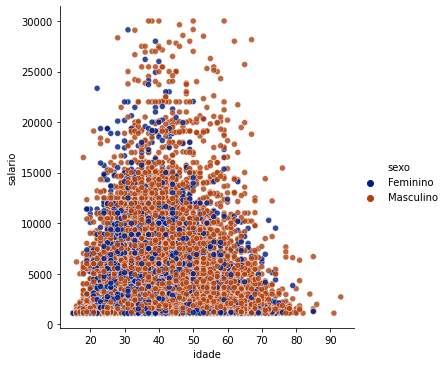

In [ ]:
plt.figure(figsize=(15,8), dpi=100)
sns.relplot(x='idade', y='salario', hue='sexo', data=df2, 
           alpha=0.8, palette='dark')

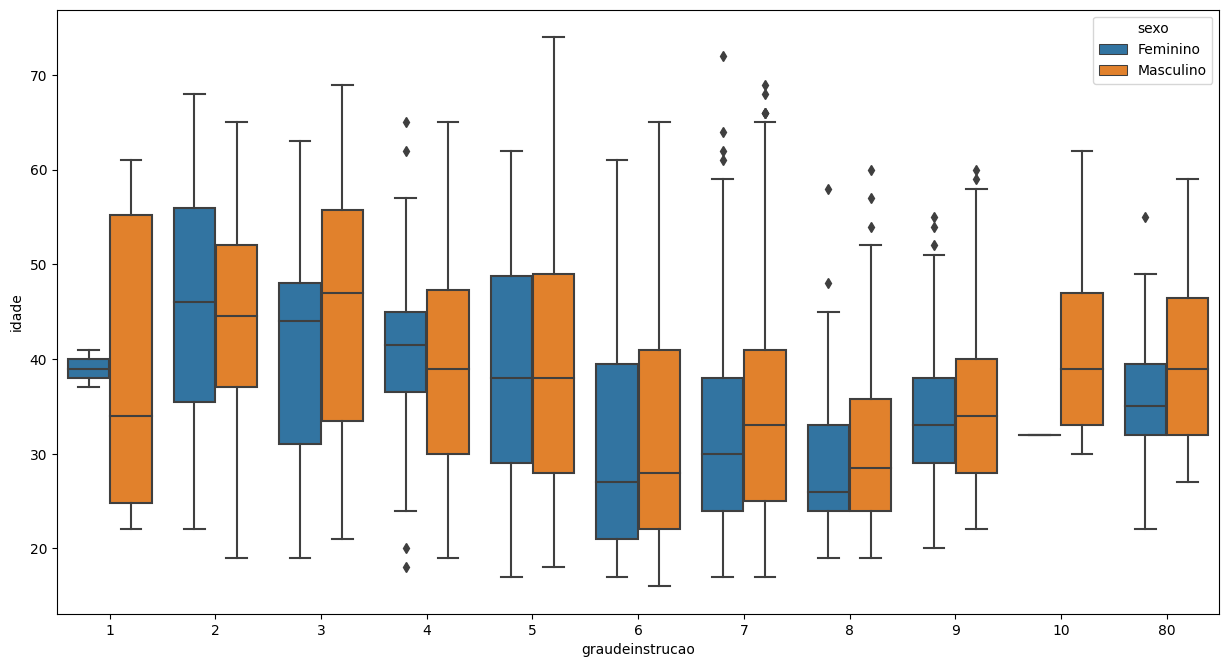

In [ ]:
plt.figure(figsize=(15,8), dpi=100)
sns.boxplot(x='graudeinstrucao',y='idade', hue='sexo', data=df2)
plt.show()

## Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
# PARA O MUNICÍPIO
# df2 = df2.drop(columns=['seção'])
X = df2.drop(columns='sexo')
y = df2.sexo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [ ]:
X_train.shape, y_train.shape

((171554, 6), (171554,))

In [ ]:
X_test.shape, y_test.shape

((42889, 6), (42889,))

In [ ]:
## IMPORTANDO ML SKLEARN
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
## CRIANDO CLASSE
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=155, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [ ]:
modelos = [{'nome': 'LogRegression',
            'modelo': LogisticRegression},
           {'nome': 'ExtraTreeCl',
            'modelo': ExtraTreesClassifier},
           {'nome': 'GradBoostClassifier',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'AdaBoostClassifier',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

In [ ]:
resultados = []
for model in modelos:
    x = ModeloAuxiliar(clf=model['modelo'])
    # treinar o modelo
    x.fit(X_train, y_train)
    
    # gerar predicao
    x_pred = x.predict(X_test)
    
    # gerar score
    acuracidade = round(x.score(X_test,y_test)*100,2)
    
    resultados.append({'nome': model['nome'],
                       'score': acuracidade,
                       'pred': x_pred })

In [ ]:
models = pd.DataFrame(resultados)

In [ ]:
models[['nome','score']].sort_values(by='score', ascending=False)

,nome,score
2,GradBoostClassifier,80.26
5,KNN,79.75
11,RForest,79.02
1,ExtraTreeCl,77.31
3,AdaBoostClassifier,76.47
10,Dtree,76.39
4,SVC,71.05
6,GaussianNB,70.50
0,LogRegression,66.65
8,LinearSVC,66.06


In [ ]:
from sklearn.model_selection import train_test_split
X = df2.drop(columns='sexo')
y = df2.sexo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=155)
modelo = GradientBoostingClassifier()
modelo.fit(X_train, y_train)
resultado = modelo.score(X_test, y_test)
print(f'Acurácia: {resultado}')

Acurácia: 0.8033761570565879


In [ ]:
modelo

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
 from sklearn.externals import joblib
 
joblib.dump(modelo, 'modelML.pkl')

['modelML.pkl']

In [ ]:
 !ls

drive  modelML.pkl  sample_data


In [ ]:
pwd

'/content'

In [ ]:
 #carregando agora
from sklearn.externals import joblib
modelo = joblib.load('modelML.pkl')

In [ ]:
import numpy as np
a = [514320,101,2,35,1,1200] # CBO / Categoria / Grau de Instrução / Idade / Raça e Cor / Salário
simulado = np.array(a)
modelo.predict(simulado.reshape(1,-1))

array([2])

In [ ]:
# Alternativamente com entrada de dados
a = int(input ('Digite o número CBO: '))
b = int(input ('Digite a Classe do trabalhador: '))
c = int(input ('Digite o Grau de Instruçao (0 a 3): '))
d = int(input ('Digite a Idade: '))
e = int(input ('Digite 1 para branco ou 2 para outra: '))
f = int(input ('Digite o salário: '))
a = [a,b,c,d,e,f] # CBO / Categoria / Grau de Instrução / Idade / Raça e Cor / Salário
simulado = np.array(a)
modelo.predict(simulado.reshape(1,-1))

Digite o número CBO: 514320
Digite a Classe do trabalhador: 101
Digite o Grau de Instruçao (0 a 3): 2
Digite a Idade: 21
Digite 1 para branco ou 2 para outra: 1
Digite o salário: 1300


array([1])